In [1]:
from os import path
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from lxml import etree
import spacy
from glob import glob
from unicodedata import normalize

In [2]:
%matplotlib inline

In [3]:
nlp = spacy.load('fr_core_news_md')

In [4]:
def est_canon(tree):
    if tree.find(".//profileDesc") is not None:
        profil = tree.find(".//profileDesc")
        if profil.get("tag") == "canon":
            print("canon")
            return True
        else:
            print("non canon")
            return False

In [5]:
def lemme_freq(path):
    tag = False
    lemmes_freq = Counter()
    with open(path, encoding="utf8") as file:
        tree = etree.parse(file)
        tag = est_canon(tree)
        if tree.findall(".//p"):
            for paragraphe in tree.findall(".//p"):
                if paragraphe.text:
                    clean_text = normalize("NFKD", paragraphe.text)
                    docs = nlp(clean_text)
                    for token in docs:
                        if token.pos_ != "PUNCT" and "SPACE" and "X" and "SYM":
                            lemmes_freq[token.lemma_] += 1          
    print("Nombre de lemmes unique dans le texte : ", len(lemmes_freq.values()))
    print("Nombre de lemmes total dans le texte : ", sum(lemmes_freq.values()))
    return tag, len(lemmes_freq), sum(lemmes_freq.values())

In [6]:
canon = False
annee_canon = []
annee_archive = []
type_token_canon = []
type_token_archive = []
for doc in glob('corpus_master/*.xml'):
    doc_name = path.splitext(path.basename(doc))[0]
    date = doc_name.split("_")[0]
    print(doc_name)
    canon, lemmes_unique, lemmes_totaux = lemme_freq(doc)
    moyenne_lemme = lemmes_unique/lemmes_totaux
    if canon:
        type_token_canon.append(moyenne_lemme)
        annee_canon.append(date)
    else:
        type_token_archive.append(moyenne_lemme)
        annee_archive.append(date)

1812_Kock-Paul-de_L-enfant-de-ma-femme
non canon
Nombre de lemmes unique dans le texte :  4644
Nombre de lemmes total dans le texte :  55185
1815_Gay-Sophie_Anatole-Vol-1
non canon
Nombre de lemmes unique dans le texte :  3421
Nombre de lemmes total dans le texte :  30466
1815_Gay-Sophie_Anatole-Vol-2
non canon
Nombre de lemmes unique dans le texte :  3364
Nombre de lemmes total dans le texte :  31913
1816_Barthelemy-Hadot-Marie-Adelaide_La-Vierge-de-l-Indostan-ou-les-Portugais-au-Malabar-(Tome-1)
non canon
Nombre de lemmes unique dans le texte :  3536
Nombre de lemmes total dans le texte :  33282
1816_Barthelemy-Hadot-Marie-Adelaide_La-Vierge-de-l-Indostan-ou-les-Portugais-au-Malabar-(Tome-2)
non canon
Nombre de lemmes unique dans le texte :  3462
Nombre de lemmes total dans le texte :  37334
1816_Barthelemy-Hadot-Marie-Adelaide_La-Vierge-de-l-Indostan-ou-les-Portugais-au-Malabar-(Tome-4)
non canon
Nombre de lemmes unique dans le texte :  3551
Nombre de lemmes total dans le texte :  3

Nombre de lemmes unique dans le texte :  3990
Nombre de lemmes total dans le texte :  28674
1831_Signol-Alphonse-Macaire-Stanislas_Le-Chiffonnier-Tome-1
non canon
Nombre de lemmes unique dans le texte :  3443
Nombre de lemmes total dans le texte :  20764
1831_Signol-Alphonse-Macaire-Stanislas_Le-Chiffonnier-Tome-2
non canon
Nombre de lemmes unique dans le texte :  3650
Nombre de lemmes total dans le texte :  26665
1831_Signol-Alphonse-Macaire-Stanislas_Le-Chiffonnier-Tome-3
non canon
Nombre de lemmes unique dans le texte :  3994
Nombre de lemmes total dans le texte :  28471
1831_Signol-Alphonse-Macaire-Stanislas_Le-Chiffonnier-Tome-4
non canon
Nombre de lemmes unique dans le texte :  3604
Nombre de lemmes total dans le texte :  23761
1831_Signol-Alphonse-Macaire-Stanislas_Le-Chiffonnier-Tome-5
non canon
Nombre de lemmes unique dans le texte :  3787
Nombre de lemmes total dans le texte :  25707
1831_Sue-Eugene_Atar-Gull
canon
Nombre de lemmes unique dans le texte :  6136
Nombre de lemme

Nombre de lemmes unique dans le texte :  3945
Nombre de lemmes total dans le texte :  27427
1837_Blanchard-Pierre_Le-Nouvelliste-de-la-jeunesse
non canon
Nombre de lemmes unique dans le texte :  7636
Nombre de lemmes total dans le texte :  64534
1837_Nodier-Charles_Ines-de-Las-Sierras
canon
Nombre de lemmes unique dans le texte :  4112
Nombre de lemmes total dans le texte :  27161
1837_Sabatier-de-Castres-Camille_La-Colonie-chretienne-histoire-de-plusieurs-deportes-jetes-par-un-naufrage-dans-une-ile-deserte-par-C-Sabatier-de-Castres-(1837)
non canon
Nombre de lemmes unique dans le texte :  6638
Nombre de lemmes total dans le texte :  68581
1837_Sand-George_La-derniere-Aldini
canon
Nombre de lemmes unique dans le texte :  6010
Nombre de lemmes total dans le texte :  67022
1837_Sand-George_Les-maitres-mosaistes
canon
Nombre de lemmes unique dans le texte :  5325
Nombre de lemmes total dans le texte :  46138
1837_Sand-George_Mauprat
canon
Nombre de lemmes unique dans le texte :  8450
Nomb

Nombre de lemmes unique dans le texte :  3778
Nombre de lemmes total dans le texte :  32984
1842_Sue-Eugene_Eugene-Sue-Oeuvres-Therese-Dunoyer-Nouvelle-edition-(1874)
canon
Nombre de lemmes unique dans le texte :  8442
Nombre de lemmes total dans le texte :  114742
1842_Sue-Eugene_Les-Mystere-de-Paris-Tome-II
canon
Nombre de lemmes unique dans le texte :  8344
Nombre de lemmes total dans le texte :  128374
1843_Balzac-Honore-de_Eugenie-GrandetFC
canon
Nombre de lemmes unique dans le texte :  6565
Nombre de lemmes total dans le texte :  67541
1843_Balzac-Honore-de_Histoire-des-Treize-_-La-Duchesse-de-LangeaisFC
canon
Nombre de lemmes unique dans le texte :  5844
Nombre de lemmes total dans le texte :  53849
1843_Balzac-Honore-de_Histoire-des-Treize-_-La-Fille-aux-yeux-d’orFC
canon
Nombre de lemmes unique dans le texte :  4412
Nombre de lemmes total dans le texte :  28563
1843_Balzac-Honore-de_Histoire-des-Treize
canon
Nombre de lemmes unique dans le texte :  8619
Nombre de lemmes total 

Nombre de lemmes unique dans le texte :  5871
Nombre de lemmes total dans le texte :  67774
1844_Tarbe-Des-Sablons-Michelle-Catherine-Josephine-Guespereau-Mme-Sebastien-Andre_Onesie-ou-les-Soirees-de-l-abbaye-suivie-de-Enguerrand-ou-le-Duel
non canon
Nombre de lemmes unique dans le texte :  6400
Nombre de lemmes total dans le texte :  91313
1844_Tavard-Eugene_Les-Effets-et-les-causes-histoire-lamentable-echafaudee-sur-une-queue-de-billard
non canon
Nombre de lemmes unique dans le texte :  5779
Nombre de lemmes total dans le texte :  41390
1845_Balzac-Honore-de_Adieu
canon
Nombre de lemmes unique dans le texte :  2836
Nombre de lemmes total dans le texte :  16247
1845_Balzac-Honore-de_El-VerdugoFC
canon
Nombre de lemmes unique dans le texte :  1127
Nombre de lemmes total dans le texte :  3909
1845_Balzac-Honore-de_Gambara
canon
Nombre de lemmes unique dans le texte :  3888
Nombre de lemmes total dans le texte :  23449
1845_Balzac-Honore-de_HonorineFC
canon
Nombre de lemmes unique dans l

Nombre de lemmes unique dans le texte :  8546
Nombre de lemmes total dans le texte :  119522
1846_Balzac-Honore-de_Les-Employes
canon
Nombre de lemmes unique dans le texte :  7707
Nombre de lemmes total dans le texte :  77492
1846_Balzac-Honore-de_Les-ProscritsFC
canon
Nombre de lemmes unique dans le texte :  2667
Nombre de lemmes total dans le texte :  12406
1846_Balzac-Honore-de_Louis-LambertFC
canon
Nombre de lemmes unique dans le texte :  5373
Nombre de lemmes total dans le texte :  41554
1846_Balzac-Honore-de_L’Envers-de-l-histoire-contemporaineFC
canon
Nombre de lemmes unique dans le texte :  7064
Nombre de lemmes total dans le texte :  76129
1846_Balzac-Honore-de_Physiologie-du-mariage-ou-Meditations-de-philosophie-eclectique-sur-le-bonheur-et-le-malheur-conjugal
canon
Nombre de lemmes unique dans le texte :  9678
Nombre de lemmes total dans le texte :  113723
1846_Balzac-Honore-de_SeraphitaFC
canon
Nombre de lemmes unique dans le texte :  5941
Nombre de lemmes total dans le tex

Nombre de lemmes unique dans le texte :  11879
Nombre de lemmes total dans le texte :  143757
1849_Dumas-Alexandre-Pere_Les-mariages-du-pere-Olifus
canon
Nombre de lemmes unique dans le texte :  6283
Nombre de lemmes total dans le texte :  69135
1849_Dumas-Alexandre-Pere_Les-mille-et-un-fantomes.
canon
Nombre de lemmes unique dans le texte :  5186
Nombre de lemmes total dans le texte :  58103
1849_Dumas-Alexandre_Le-Collier-de-la-reine
canon
Nombre de lemmes unique dans le texte :  12363
Nombre de lemmes total dans le texte :  265304
1849_Sand-George_La-petite-Fadette
canon
Nombre de lemmes unique dans le texte :  4280
Nombre de lemmes total dans le texte :  64515
1849_Sue-Eugene_Les-Mysteres-du-peuple-Tome-I
canon
Nombre de lemmes unique dans le texte :  6842
Nombre de lemmes total dans le texte :  80413
1849_Sue-Eugene_Les-Mysteres-du-peuple-Tome-II
canon
Nombre de lemmes unique dans le texte :  6917
Nombre de lemmes total dans le texte :  91723
1850_Bassanville-Anais-de_Le-Soir-et-l

Nombre de lemmes unique dans le texte :  7419
Nombre de lemmes total dans le texte :  80516
1854_Barthelemy-(de-Paris)-Charles_Histoire-de-la-Bretagne-ancienne-et-moderne
non canon
Nombre de lemmes unique dans le texte :  10091
Nombre de lemmes total dans le texte :  134589
1854_Bassanville-Anais-de_Les-Primeurs-de-la-vie-ou-Bonheurs-joies-et-douleurs-de-la-jeunesse
non canon
Nombre de lemmes unique dans le texte :  4135
Nombre de lemmes total dans le texte :  35892
1854_Collin-de-Plancy-Jacques-Albin-Simon_Les-Tribulations-de-Robillard-ou-les-Honnetes-gens-comme-il-y-en-a-trop
non canon
Nombre de lemmes unique dans le texte :  2865
Nombre de lemmes total dans le texte :  19731
1854_Dumas-Alexandre-Pere_Le-capitaine-Richard
canon
Nombre de lemmes unique dans le texte :  6367
Nombre de lemmes total dans le texte :  83842
1854_Dumas-Alexandre-Pere_Les-Mohicans-de-Paris-1
canon
Nombre de lemmes unique dans le texte :  8831
Nombre de lemmes total dans le texte :  119556
1854_Dumas-Alexandr

Nombre de lemmes unique dans le texte :  6815
Nombre de lemmes total dans le texte :  74050
1857_About-Edmond_Le-Roi-des-montagnes
non canon
Nombre de lemmes unique dans le texte :  6977
Nombre de lemmes total dans le texte :  70244
1857_Aimard-Gustave_Les-trappeurs-de-l-Arkansas
non canon
Nombre de lemmes unique dans le texte :  6926
Nombre de lemmes total dans le texte :  94684
1857_Dumas-Alexandre_Le-meneur-de-loups
canon
Nombre de lemmes unique dans le texte :  6890
Nombre de lemmes total dans le texte :  86718
1857_Dumas-Alexandre_Les-Compagnons-de-Jehu
canon
Nombre de lemmes unique dans le texte :  10961
Nombre de lemmes total dans le texte :  206042
1857_Feuillet-Octave_La-petite-comtesse
non canon
Nombre de lemmes unique dans le texte :  4384
Nombre de lemmes total dans le texte :  31689
1857_Feval-Paul-(pere)_Le-Bossu
non canon
Nombre de lemmes unique dans le texte :  11611
Nombre de lemmes total dans le texte :  232768
1857_Feval-Paul-(pere)_Les-Compagnons-du-Silence-I
non ca

Nombre de lemmes unique dans le texte :  3795
Nombre de lemmes total dans le texte :  34283
1859_Ulbach-Louis_Pauline-Foucault
non canon
Nombre de lemmes unique dans le texte :  8527
Nombre de lemmes total dans le texte :  133753
1860_Assollant-Alfred_Histoire-fantastique-du-celebre-Pierrot
non canon
Nombre de lemmes unique dans le texte :  3261
Nombre de lemmes total dans le texte :  26119
1860_Dumas-Alexandre-Pere_Jacquot-sans-Oreilles
canon
Nombre de lemmes unique dans le texte :  3715
Nombre de lemmes total dans le texte :  30987
1860_Dumas-Alexandre-Pere_L-Horoscope
canon
Nombre de lemmes unique dans le texte :  6448
Nombre de lemmes total dans le texte :  91146
1860_Dumas-Alexandre-Pere_Une-aventure-d-amour
canon
Nombre de lemmes unique dans le texte :  4057
Nombre de lemmes total dans le texte :  35566
1860_Erckmann-Chatrian_Contes-fantastiques
non canon
Nombre de lemmes unique dans le texte :  7150
Nombre de lemmes total dans le texte :  71766
1860_Feval-Paul-(pere)_Le-Chevalie

Nombre de lemmes unique dans le texte :  5536
Nombre de lemmes total dans le texte :  53057
1862_Guise-Charles-de_Le-Cap-au-Diable
non canon
Nombre de lemmes unique dans le texte :  2774
Nombre de lemmes total dans le texte :  17540
1862_Hugo-Victor_Les-Miserables
canon
Nombre de lemmes unique dans le texte :  22944
Nombre de lemmes total dans le texte :  552462
1862_Leneveux-Louise_Soirees-en-famille--lectures-pour-la-jeunesse
non canon
Nombre de lemmes unique dans le texte :  9636
Nombre de lemmes total dans le texte :  131993
1862_Malot-Hector_Les-Amants
non canon
Nombre de lemmes unique dans le texte :  8664
Nombre de lemmes total dans le texte :  132868
1862_Ponson-du-Terrail-Pierre-Alexis-de_Les-Nuits-de-la-Maison-doree
non canon
Nombre de lemmes unique dans le texte :  5600
Nombre de lemmes total dans le texte :  72333
1862_Pont-Jest-Rene-de_Bolino-le-negrier-souvenirs-de-l-Ocean-Indien
non canon
Nombre de lemmes unique dans le texte :  7230
Nombre de lemmes total dans le texte 

Nombre de lemmes unique dans le texte :  5066
Nombre de lemmes total dans le texte :  82875
1865_Erckmann-Chatrian_Waterloo
non canon
Nombre de lemmes unique dans le texte :  5166
Nombre de lemmes total dans le texte :  83083
1865_Feval-Paul-(pere)_Les-habits-noirs-Tome-II-Coeur-d-acier
non canon
Nombre de lemmes unique dans le texte :  10889
Nombre de lemmes total dans le texte :  179319
1865_Gautier-Theophile_La-belle-Jenny
canon
Nombre de lemmes unique dans le texte :  7746
Nombre de lemmes total dans le texte :  67777
1865_Kaempfen-Albert_La-Tasse-a-the
non canon
Nombre de lemmes unique dans le texte :  4261
Nombre de lemmes total dans le texte :  28562
1865_Maricourt-Rene-Du-Mesnil_Donatien
non canon
Nombre de lemmes unique dans le texte :  7303
Nombre de lemmes total dans le texte :  64403
1865_Ponson-du-Terrail-Pierre-Alexis-de_Le-Castel-du-Diable
non canon
Nombre de lemmes unique dans le texte :  6439
Nombre de lemmes total dans le texte :  65293
1865_Ponson-du-Terrail-Pierre-A

Nombre de lemmes unique dans le texte :  3639
Nombre de lemmes total dans le texte :  30580
1867_Pressense-Elise-de_Deux-ans-au-lycee
non canon
Nombre de lemmes unique dans le texte :  5031
Nombre de lemmes total dans le texte :  71214
1867_Privat-Esprit_Les-Idoles-du-jour
non canon
Nombre de lemmes unique dans le texte :  5448
Nombre de lemmes total dans le texte :  44463
1867_Robert-Adrien_Le-Radieux
non canon
Nombre de lemmes unique dans le texte :  5576
Nombre de lemmes total dans le texte :  51397
1867_Sauquet-Victor_L-Enfant-des-montagnes
non canon
Nombre de lemmes unique dans le texte :  8187
Nombre de lemmes total dans le texte :  74365
1867_Savigny-Laurence-de_Le-Robinson-des-Alpes
non canon
Nombre de lemmes unique dans le texte :  4958
Nombre de lemmes total dans le texte :  51189
1867_Segur-comtesse-de_Le-Mauvais-Genie
non canon
Nombre de lemmes unique dans le texte :  4258
Nombre de lemmes total dans le texte :  48445
1867_Taulier-Jules_Les-Deux-petits-Robinsons-de-la-Grand

Nombre de lemmes unique dans le texte :  5781
Nombre de lemmes total dans le texte :  70558
1869_Murger-Henri_Scenes-de-la-vie-de-Boheme
non canon
Nombre de lemmes unique dans le texte :  8206
Nombre de lemmes total dans le texte :  104529
1869_Pillon-Alexandre_Les-Contes-noirs
non canon
Nombre de lemmes unique dans le texte :  6185
Nombre de lemmes total dans le texte :  51424
1869_Ponson-du-Terrail-Pierre-Alexis-de_La-reine-des-barricades
non canon
Nombre de lemmes unique dans le texte :  6632
Nombre de lemmes total dans le texte :  107165
1869_Ponson-du-Terrail-Pierre-Alexis-de_Les-Heros-de-la-vie-privee-Jeanne
non canon
Nombre de lemmes unique dans le texte :  5045
Nombre de lemmes total dans le texte :  62613
1869_Ponson-du-Terrail-Pierre-Alexis-de_Les-Heros-de-la-vie-privee-L-Orgue-de-Barbarie
non canon
Nombre de lemmes unique dans le texte :  5408
Nombre de lemmes total dans le texte :  73953
1869_Ponson-du-Terrail-Pierre_Le-Forgeron-de-la-Cour-Dieu-Tome-I
non canon
Nombre de le

Nombre de lemmes unique dans le texte :  6634
Nombre de lemmes total dans le texte :  82410
1873_Gaboriau-Emile_La-corde-au-cou
non canon
Nombre de lemmes unique dans le texte :  9403
Nombre de lemmes total dans le texte :  178883
1873_Gouraud-Julie_Petite-et-grande
non canon
Nombre de lemmes unique dans le texte :  4409
Nombre de lemmes total dans le texte :  44805
1873_L-Epine-Ernest_La-vie-a-grand-orchestre--charivari-parisien
non canon
Nombre de lemmes unique dans le texte :  8523
Nombre de lemmes total dans le texte :  85708
1873_Malot-Hector_Clotilde-Martory
non canon
Nombre de lemmes unique dans le texte :  7905
Nombre de lemmes total dans le texte :  131619
1873_Marmette-Joseph_Chevalier-de-Mornac--Chronique-de-la-Nouvelle-France-(1664)
non canon
Nombre de lemmes unique dans le texte :  7985
Nombre de lemmes total dans le texte :  92805
1873_Pressense-Elise-de_Un-petit-monde-d-enfants
non canon
Nombre de lemmes unique dans le texte :  3767
Nombre de lemmes total dans le texte :

Nombre de lemmes unique dans le texte :  7765
Nombre de lemmes total dans le texte :  109128
1876_Aimard-Gustave_Le-Chasseur-de-rats-Tome-1-L-oeil-gris
non canon
Nombre de lemmes unique dans le texte :  7063
Nombre de lemmes total dans le texte :  88056
1876_Aimard-Gustave_Le-Chasseur-de-rats-Tome-2-Le-commandant-Delgres
non canon
Nombre de lemmes unique dans le texte :  6107
Nombre de lemmes total dans le texte :  86166
1876_Aimard-Gustave_Les-invisibles-de-Paris-Les-Compagnons-de-la-Lune(1)
non canon
Nombre de lemmes unique dans le texte :  7163
Nombre de lemmes total dans le texte :  69641
1876_Allary-Camille_Au-pays-des-cigales
non canon
Nombre de lemmes unique dans le texte :  4252
Nombre de lemmes total dans le texte :  24682
1876_Bastide-Jenny_Le-Marquis-Roger
non canon
Nombre de lemmes unique dans le texte :  5344
Nombre de lemmes total dans le texte :  90938
1876_Belot-Adolphe_Le-secret-terrible--memoires-d-un-caissier
non canon
Nombre de lemmes unique dans le texte :  8067
No

Nombre de lemmes unique dans le texte :  8631
Nombre de lemmes total dans le texte :  134158
1876_Sarcey-Francisque_Etienne-Moret
non canon
Nombre de lemmes unique dans le texte :  5224
Nombre de lemmes total dans le texte :  44992
1876_Sarcey-Francisque_Le-Piano-de-Jeanne-Qui-perd-gagne-Il-ne-faut-jamais-dire--Fontaine-Un-ami-veritable
non canon
Nombre de lemmes unique dans le texte :  6611
Nombre de lemmes total dans le texte :  64885
1876_Theuriet-Andre_La-Fortune-d-Angele
non canon
Nombre de lemmes unique dans le texte :  7641
Nombre de lemmes total dans le texte :  73104
1876_Verne-Jules_Michel-Strogoff
canon
Nombre de lemmes unique dans le texte :  8071
Nombre de lemmes total dans le texte :  110725
1876_Voisins-d-Ambre-Anne-Caroline-Josephine-Husson-Madame-de-(pseud-Pierre-Coeur)_La-Fille-du-rabbin
non canon
Nombre de lemmes unique dans le texte :  4408
Nombre de lemmes total dans le texte :  35339
1876_Zola-Emile_Son-excellence-Eugene-Rougon
canon
Nombre de lemmes unique dans l

non canon
Nombre de lemmes unique dans le texte :  7460
Nombre de lemmes total dans le texte :  90969
1878_Chevalier-H-Emile_La-fille-du-pirate
non canon
Nombre de lemmes unique dans le texte :  7358
Nombre de lemmes total dans le texte :  54660
1878_Chevalier-H-Emile_Le-gibet
non canon
Nombre de lemmes unique dans le texte :  6997
Nombre de lemmes total dans le texte :  62156
1878_Claretie-Jules_La-Maison-vide
non canon
Nombre de lemmes unique dans le texte :  8758
Nombre de lemmes total dans le texte :  130583
1878_Cornely-Jules_L-Oeil-du-diable
non canon
Nombre de lemmes unique dans le texte :  8422
Nombre de lemmes total dans le texte :  126568
1878_Dupuis-Eudoxie_Cyprienne-et-Cyprien
non canon
Nombre de lemmes unique dans le texte :  6765
Nombre de lemmes total dans le texte :  95680
1878_Feval-Paul-(pere)_Contes-de-Bretagne
non canon
Nombre de lemmes unique dans le texte :  5242
Nombre de lemmes total dans le texte :  51771
1878_Gaboriau-Emile_Le-capitaine-Coutanceau
non canon
No

Nombre de lemmes unique dans le texte :  8101
Nombre de lemmes total dans le texte :  69641
1879_La-Landelle-Guillaume-Joseph-Gabriel-de_Une-Haine-a-bord
non canon
Nombre de lemmes unique dans le texte :  8330
Nombre de lemmes total dans le texte :  80627
1879_Lachese-Marthe_Le-Mariage-de-Renee
non canon
Nombre de lemmes unique dans le texte :  4924
Nombre de lemmes total dans le texte :  54916
1879_Larue-Hubert_Voyage-sentimental-sur-la-rue-Saint-Jean
non canon
Nombre de lemmes unique dans le texte :  3208
Nombre de lemmes total dans le texte :  17052
1879_Lavigne-Ernest_Le-Roman-d-une-nihiliste
non canon
Nombre de lemmes unique dans le texte :  8884
Nombre de lemmes total dans le texte :  119584
1879_Lebourgeois-Marie_La-Goutte-de-miel
non canon
Nombre de lemmes unique dans le texte :  10353
Nombre de lemmes total dans le texte :  139890
1879_Merouvel-Charles_La-Vertu-de-l-abbe-Mirande-moeurs-parisiennes
non canon
Nombre de lemmes unique dans le texte :  8714
Nombre de lemmes total d

Nombre de lemmes unique dans le texte :  6401
Nombre de lemmes total dans le texte :  96694
1881_Buet-Charles_Histoires-a-dormir-debout
non canon
Nombre de lemmes unique dans le texte :  7003
Nombre de lemmes total dans le texte :  48369
1881_Cherbuliez-Victor_Noirs-et-Rouges
non canon
Nombre de lemmes unique dans le texte :  8619
Nombre de lemmes total dans le texte :  108738
1881_Cladel-Leon_Les-Va-Nu-Pieds
non canon
Nombre de lemmes unique dans le texte :  11037
Nombre de lemmes total dans le texte :  76538
1881_Colomb-Josephine_Feu-de-paille
non canon
Nombre de lemmes unique dans le texte :  5796
Nombre de lemmes total dans le texte :  79582
1881_Courcy-Alfred-de_Le-Roman-cache
non canon
Nombre de lemmes unique dans le texte :  9449
Nombre de lemmes total dans le texte :  124927
1881_Daudet-Alphonse_Numa-Roumestan
canon
Nombre de lemmes unique dans le texte :  9288
Nombre de lemmes total dans le texte :  87235
1881_Desbeaux-Emile_Les-Pourquoi-de-mademoiselle-Suzanne
non canon
Nombr

Nombre de lemmes unique dans le texte :  8306
Nombre de lemmes total dans le texte :  69296
1882_La-Landelle-Guillaume-Joseph-Gabriel-de_Rouget-et-Noiraud
non canon
Nombre de lemmes unique dans le texte :  7438
Nombre de lemmes total dans le texte :  73055
1882_Lacroix-Auguste_La-Famille-Robert
non canon
Nombre de lemmes unique dans le texte :  5365
Nombre de lemmes total dans le texte :  73394
1882_Loti-Pierre_Mon-frere-Yves
canon
Nombre de lemmes unique dans le texte :  6164
Nombre de lemmes total dans le texte :  75322
1882_Loti-Pierre_Suleima
canon
Nombre de lemmes unique dans le texte :  2283
Nombre de lemmes total dans le texte :  13949
1882_Macaire-Robert-_Memoires-de-Robert-Macaire-ecrits-par-lui-meme
non canon
Nombre de lemmes unique dans le texte :  6756
Nombre de lemmes total dans le texte :  92256
1882_Merouvel-Charles_Le-Mari-de-la-Florentine-suite-et-fin-de-les-Deux-Maitresses
non canon
Nombre de lemmes unique dans le texte :  9192
Nombre de lemmes total dans le texte :  

Nombre de lemmes unique dans le texte :  5988
Nombre de lemmes total dans le texte :  59253
1883_Loti-Pierre_L-exilee
canon
Nombre de lemmes unique dans le texte :  4032
Nombre de lemmes total dans le texte :  25960
1883_Merouvel-Charles_Angele-Meraud
non canon
Nombre de lemmes unique dans le texte :  9426
Nombre de lemmes total dans le texte :  101129
1883_Millanvoye-Bertrand-Etievant-A._Les-Coquines-par-B-Millanvoye-et-A-Etievant-(1883)
non canon
Nombre de lemmes unique dans le texte :  9323
Nombre de lemmes total dans le texte :  123322
1883_Monnier-Marc_Un-detraque-roman-experimental-par-Marc-Monnier-(1883)
non canon
Nombre de lemmes unique dans le texte :  7025
Nombre de lemmes total dans le texte :  79089
1883_Montagne-Edouard_Le-Batard-de-Ravaillac-par-Edouard-Montagne-(1883)
non canon
Nombre de lemmes unique dans le texte :  12658
Nombre de lemmes total dans le texte :  127433
1883_Pont-Jest-Rene-de_La-Femme-de-cire
non canon
Nombre de lemmes unique dans le texte :  5912
Nombre

non canon
Nombre de lemmes unique dans le texte :  6082
Nombre de lemmes total dans le texte :  81941
1884_Zola-Emile_La-joie-de-vivre
canon
Nombre de lemmes unique dans le texte :  7918
Nombre de lemmes total dans le texte :  126871
1885_Amero-Constant_Le-tour-de-France-d-un-petit-Parisien
non canon
Nombre de lemmes unique dans le texte :  16921
Nombre de lemmes total dans le texte :  259229
1885_Barbey-d-Aurevilly-Jules_Une-page-d-histoire
canon
Nombre de lemmes unique dans le texte :  1173
Nombre de lemmes total dans le texte :  4597
1885_Bazin-Rene_Ma-tante-Giron
non canon
Nombre de lemmes unique dans le texte :  5424
Nombre de lemmes total dans le texte :  51895
1885_Belot-Adophe_Une-affolee-d'amour
non canon
Nombre de lemmes unique dans le texte :  4352
Nombre de lemmes total dans le texte :  49152
1885_Boisgobey-Fortune-du_La-voilette-bleue
non canon
Nombre de lemmes unique dans le texte :  6720
Nombre de lemmes total dans le texte :  107402
1885_Boisgobey-Fortune-du_Le-pouce-cr

Nombre de lemmes unique dans le texte :  2187
Nombre de lemmes total dans le texte :  12758
1887_Greville-Henry_Nikanor
non canon
Nombre de lemmes unique dans le texte :  5812
Nombre de lemmes total dans le texte :  66650
1887_Guy-de-Maupassant_Le-Horla
canon
Nombre de lemmes unique dans le texte :  5040
Nombre de lemmes total dans le texte :  46642
1887_Guy-de-Maupassant_Mont-Oriol
canon
Nombre de lemmes unique dans le texte :  7176
Nombre de lemmes total dans le texte :  89139
1887_Huysmans-Joris-Karl_Un-dilemme
canon
Nombre de lemmes unique dans le texte :  3641
Nombre de lemmes total dans le texte :  19005
1887_Loti-Pierre_Madame-Chrysantheme
canon
Nombre de lemmes unique dans le texte :  5707
Nombre de lemmes total dans le texte :  49489
1887_Malot-Hector_Ghislaine
non canon
Nombre de lemmes unique dans le texte :  6489
Nombre de lemmes total dans le texte :  99010
1887_Mary-Jules_La-Revanche-de-Roger-la-honte
non canon
Nombre de lemmes unique dans le texte :  6718
Nombre de lemme

canon
Nombre de lemmes unique dans le texte :  1690
Nombre de lemmes total dans le texte :  5882
1890_Bazin-Rene_Les-Noellet
non canon
Nombre de lemmes unique dans le texte :  6423
Nombre de lemmes total dans le texte :  72583
1890_Bourget-Paul_Un-Coeur-de-femme
canon
Nombre de lemmes unique dans le texte :  6107
Nombre de lemmes total dans le texte :  69199
1890_Darien-Georges_Biribi-Discipline-Militaire
non canon
Nombre de lemmes unique dans le texte :  7360
Nombre de lemmes total dans le texte :  79715
1890_Daudet-Alphonse_Port-Tarascon-Dernieres-aventures-de-l-illustre-Tartarin
canon
Nombre de lemmes unique dans le texte :  6291
Nombre de lemmes total dans le texte :  48746
1890_Daudet-Ernest_Fils-d-emigre
non canon
Nombre de lemmes unique dans le texte :  8535
Nombre de lemmes total dans le texte :  130958
1890_Delpit-Edouard_Yvonne
non canon
Nombre de lemmes unique dans le texte :  5944
Nombre de lemmes total dans le texte :  52692
1890_Dombre-Roger_La-Nounou
non canon
Nombre de 

Nombre de lemmes unique dans le texte :  5465
Nombre de lemmes total dans le texte :  42545
1892_Lesueur-Daniel_Passion-slave
non canon
Nombre de lemmes unique dans le texte :  7290
Nombre de lemmes total dans le texte :  73174
1892_Loti-Pierre_Fantome-d-Orient
canon
Nombre de lemmes unique dans le texte :  2438
Nombre de lemmes total dans le texte :  15140
1892_Mendes-Catulle_Luscignole
non canon
Nombre de lemmes unique dans le texte :  4469
Nombre de lemmes total dans le texte :  30317
1892_Prevost-Marcel_L-automne-d-une-femme
non canon
Nombre de lemmes unique dans le texte :  6903
Nombre de lemmes total dans le texte :  74062
1892_Renard-Jules_L-Ecornifleur
canon
Nombre de lemmes unique dans le texte :  5220
Nombre de lemmes total dans le texte :  43077
1892_Rodenbach-Georges_Bruges-la-Morte
canon
Nombre de lemmes unique dans le texte :  3676
Nombre de lemmes total dans le texte :  22251
1892_Schwob-Marcel_Le-roi-au-masque-d-or
canon
Nombre de lemmes unique dans le texte :  5316
Nom

Nombre de lemmes unique dans le texte :  7806
Nombre de lemmes total dans le texte :  63424
1895_Arene-Paul_Le-Midi-bouge
non canon
Nombre de lemmes unique dans le texte :  6622
Nombre de lemmes total dans le texte :  47459
1895_de-Lano-Pierre_Carnet-d-une-femme
non canon
Nombre de lemmes unique dans le texte :  4629
Nombre de lemmes total dans le texte :  41052
1895_France-Anatole_Le-Puit-de-Sainte-Claire
canon
Nombre de lemmes unique dans le texte :  5978
Nombre de lemmes total dans le texte :  54854
1895_Gide-Andre_Paludes
canon
Nombre de lemmes unique dans le texte :  2907
Nombre de lemmes total dans le texte :  21457
1895_Huysmans-Joris-Karl_En-Route
canon
Nombre de lemmes unique dans le texte :  11565
Nombre de lemmes total dans le texte :  127320
1895_Ivoi-Paul-d-_Le-Sergent-Simplet-a-travers-les-colonies-françaises
non canon
Nombre de lemmes unique dans le texte :  12963
Nombre de lemmes total dans le texte :  164671
1895_Leblanc-Maurice_Contes
non canon
Nombre de lemmes unique

Nombre de lemmes unique dans le texte :  7833
Nombre de lemmes total dans le texte :  61867
1898_Dondel-Du-Faouedic-Noemie_Voyages-loin-de-ma-chambre-tome-2
non canon
Nombre de lemmes unique dans le texte :  9286
Nombre de lemmes total dans le texte :  77701
1898_Feval-Paul-(pere)_La-fabrique-de-crimes
non canon
Nombre de lemmes unique dans le texte :  4843
Nombre de lemmes total dans le texte :  31500
1898_Huysmans-Joris-Karl_La-Cathedrale
canon
Nombre de lemmes unique dans le texte :  13572
Nombre de lemmes total dans le texte :  134792
1898_Ivoi-Paul-d-_Corsaire-Triplex
non canon
Nombre de lemmes unique dans le texte :  10737
Nombre de lemmes total dans le texte :  133533
1898_Ivoi-Paul-d-_La-Capitaine-Nilia
non canon
Nombre de lemmes unique dans le texte :  10777
Nombre de lemmes total dans le texte :  140043
1898_Lesueur-Daniel_Levres-closes
non canon
Nombre de lemmes unique dans le texte :  4688
Nombre de lemmes total dans le texte :  34111
1898_Louÿs-Pierre_La-femme-et-le-pantin

Nombre de lemmes unique dans le texte :  8366
Nombre de lemmes total dans le texte :  61979
1901_Louÿs-Pierre_Les-aventures-du-roi-Pausole
canon
Nombre de lemmes unique dans le texte :  7274
Nombre de lemmes total dans le texte :  70731
1901_Mael-Pierre_Un-mousse-de-Surcouf
non canon
Nombre de lemmes unique dans le texte :  6534
Nombre de lemmes total dans le texte :  63733
1901_Soboleska-Mme-(pseud-Jacques-Lermont)_Les-Bonnes-idees-de-Mlle-Rose-Les-Enfants-au-ballon-elastique
non canon
Nombre de lemmes unique dans le texte :  2837
Nombre de lemmes total dans le texte :  23541
1901_Thurner-Georges_Mademoiselle-Flammette.
non canon
Nombre de lemmes unique dans le texte :  5908
Nombre de lemmes total dans le texte :  63463
1902_Allais-Alphonse_Le-Captain-Cap
non canon
Nombre de lemmes unique dans le texte :  6441
Nombre de lemmes total dans le texte :  44468
1902_Bazin-Rene_Contes-de-bonne-Perrette
non canon
Nombre de lemmes unique dans le texte :  7119
Nombre de lemmes total dans le tex

Nombre de lemmes unique dans le texte :  5269
Nombre de lemmes total dans le texte :  49016
1905_Le-Roy-Eugene_Le-moulin-du-Frau
non canon
Nombre de lemmes unique dans le texte :  6605
Nombre de lemmes total dans le texte :  85932
1905_Lermina-Jules_To-Ho-Le-Tueur-d-or
non canon
Nombre de lemmes unique dans le texte :  6439
Nombre de lemmes total dans le texte :  60776
1905_Loti-Pierre_La-troisieme-jeunesse-de-Madame-Prune
canon
Nombre de lemmes unique dans le texte :  6284
Nombre de lemmes total dans le texte :  51286
1905_Ramuz-Charles-Ferdinand_Aline
canon
Nombre de lemmes unique dans le texte :  2749
Nombre de lemmes total dans le texte :  26729
1905_Rebell-Hugues_Gringalette
non canon
Nombre de lemmes unique dans le texte :  4552
Nombre de lemmes total dans le texte :  35724
1905_Renard-Maurice_Fantomes-et-Fantoches
non canon
Nombre de lemmes unique dans le texte :  5266
Nombre de lemmes total dans le texte :  25487
1905_Rolland-Romain_Jean-Christophe-Tome-IV-La-revolte
canon
Nomb

Nombre de lemmes unique dans le texte :  4877
Nombre de lemmes total dans le texte :  36003
1909_Corday-Michel_Plaisirs-d-auto
non canon
Nombre de lemmes unique dans le texte :  5756
Nombre de lemmes total dans le texte :  40117
1909_Dhanys-Marcel_La-fille-de-Racine
non canon
Nombre de lemmes unique dans le texte :  309
Nombre de lemmes total dans le texte :  667
1909_Farrere-Claude_La-Bataille
non canon
Nombre de lemmes unique dans le texte :  7091
Nombre de lemmes total dans le texte :  55517
1909_Feval-Paul-fils_Les-suites-de-lagardere-7-Le-parc-aux-cerfs
non canon
Nombre de lemmes unique dans le texte :  8271
Nombre de lemmes total dans le texte :  105575
1909_Feval-Paul-fils_Les-suites-de-lagardere-8-La-reine-cotillon
non canon
Nombre de lemmes unique dans le texte :  8714
Nombre de lemmes total dans le texte :  104219
1909_Giraudoux-Jean_Provinciales
canon
Nombre de lemmes unique dans le texte :  5377
Nombre de lemmes total dans le texte :  40343
1909_Ivoi-Paul-d-_L-Espion-X-323-

Nombre de lemmes unique dans le texte :  6680
Nombre de lemmes total dans le texte :  84337
1912_Boylesve-Rene_Madeleine-jeune-femme
non canon
Nombre de lemmes unique dans le texte :  8359
Nombre de lemmes total dans le texte :  100586
1912_Courteline-Georges_Les-Linottes
non canon
Nombre de lemmes unique dans le texte :  7662
Nombre de lemmes total dans le texte :  58988
1912_Delly_Fleurs-du-foyer-fleurs-du-cloitre
non canon
Nombre de lemmes unique dans le texte :  5037
Nombre de lemmes total dans le texte :  54943
1912_France-Anatole_Les-Dieux-ont-soif
canon
Nombre de lemmes unique dans le texte :  7810
Nombre de lemmes total dans le texte :  72691
1912_Lafon-Andre_L-eleve-Gilles
non canon
Nombre de lemmes unique dans le texte :  5003
Nombre de lemmes total dans le texte :  40942
1912_Leblanc-Maurice_Le-Bouchon-de-cristal
non canon
Nombre de lemmes unique dans le texte :  6391
Nombre de lemmes total dans le texte :  77754
1912_Lensia-Jenny_Genie-du-foyer
non canon
Nombre de lemmes un

Nombre de lemmes unique dans le texte :  3494
Nombre de lemmes total dans le texte :  44664
1918_Gustave-Le-Rouge-de-Brisay-Henri_L-Heroine-du-Colorado
non canon
Nombre de lemmes unique dans le texte :  9052
Nombre de lemmes total dans le texte :  143033
1918_Laberge-Albert_La-Scouine
non canon
Nombre de lemmes unique dans le texte :  4821
Nombre de lemmes total dans le texte :  32386
1918_Le-Rouge-Gustave_Le-Mysterieux-Docteur-Cornelius
non canon
Nombre de lemmes unique dans le texte :  16318
Nombre de lemmes total dans le texte :  383477
1918_Leblanc-Maurice_Le-Triangle-d-or
non canon
Nombre de lemmes unique dans le texte :  6821
Nombre de lemmes total dans le texte :  97947
1918_Leroux-Gaston_Les-etranges-noces-de-Rouletabille
non canon
Nombre de lemmes unique dans le texte :  6155
Nombre de lemmes total dans le texte :  83616
1918_Proust-Marcel_A-l-ombre-des-jeunes-filles-en-fleurs-A-la-recherche-du-temps-perdu
canon
Nombre de lemmes unique dans le texte :  13027
Nombre de lemmes t

Nombre de lemmes unique dans le texte :  9003
Nombre de lemmes total dans le texte :  127720
1922_Jaloux-Edmond_L-escalier-d-or
non canon
Nombre de lemmes unique dans le texte :  5326
Nombre de lemmes total dans le texte :  40321
1922_Leblanc-Maurice_Le-Cercle-rouge
non canon
Nombre de lemmes unique dans le texte :  6070
Nombre de lemmes total dans le texte :  71529
1922_Leroux-Gaston_Le-coeur-cambriole
non canon
Nombre de lemmes unique dans le texte :  4623
Nombre de lemmes total dans le texte :  47133
1922_Leroux-Gaston_Le-crime-de-Rouletabille
non canon
Nombre de lemmes unique dans le texte :  4879
Nombre de lemmes total dans le texte :  54579
1922_Margueritte-Victor_La-garçonne
non canon
Nombre de lemmes unique dans le texte :  9435
Nombre de lemmes total dans le texte :  73186
1922_Margueritte-Victor_Poum-(aventures-d-un-petit-garçon)
non canon
Nombre de lemmes unique dans le texte :  4899
Nombre de lemmes total dans le texte :  33298
1922_Martin-du-Gard-Roger_Les-Thibault-Tome-I-

Nombre de lemmes unique dans le texte :  5672
Nombre de lemmes total dans le texte :  75394
1926_Delly_L'infidele
non canon
Nombre de lemmes unique dans le texte :  3706
Nombre de lemmes total dans le texte :  31971
1926_Delly_La-vengeance-de-Ralph
non canon
Nombre de lemmes unique dans le texte :  5417
Nombre de lemmes total dans le texte :  64512
1926_Delly_Le-secret-de-la-Luzette
non canon
Nombre de lemmes unique dans le texte :  4471
Nombre de lemmes total dans le texte :  39106
1926_Galopin-Arnould_La-tenebreuse-affaire-de-Green-Park
non canon
Nombre de lemmes unique dans le texte :  4911
Nombre de lemmes total dans le texte :  38896
1926_Genevoix-Maurice_La-boite-a-peche
non canon
Nombre de lemmes unique dans le texte :  6775
Nombre de lemmes total dans le texte :  54850
1926_Gide-Andre_Si-le-grain-ne-meurt
canon
Nombre de lemmes unique dans le texte :  10021
Nombre de lemmes total dans le texte :  109646
1926_Hemon-Louis_Battling-Malone-pugiliste
non canon
Nombre de lemmes uniqu

Nombre de lemmes unique dans le texte :  4077
Nombre de lemmes total dans le texte :  20033
1930_Delly_Gille-de-Cesbres
non canon
Nombre de lemmes unique dans le texte :  4888
Nombre de lemmes total dans le texte :  58668
1930_Delly_La-maison-du-lis
non canon
Nombre de lemmes unique dans le texte :  4080
Nombre de lemmes total dans le texte :  33755
1930_Galopin-Arnould_Le-sergent-Bucaille
non canon
Nombre de lemmes unique dans le texte :  6321
Nombre de lemmes total dans le texte :  63551
1930_Genestoux-Magdeleine-du_Mademoiselle-trouble-fete
non canon
Nombre de lemmes unique dans le texte :  3521
Nombre de lemmes total dans le texte :  70410
1930_Giono-Jean_Regain
canon
Nombre de lemmes unique dans le texte :  3289
Nombre de lemmes total dans le texte :  42629
1930_Lallier-Joseph_Angeline-Guillou
non canon
Nombre de lemmes unique dans le texte :  5402
Nombre de lemmes total dans le texte :  51266
1930_Leblanc-Maurice_Le-Cabochon-d-emeraude
non canon
Nombre de lemmes unique dans le te

Nombre de lemmes unique dans le texte :  5961
Nombre de lemmes total dans le texte :  65433
1934_Leblanc-Maurice_Le-chapelet-rouge
non canon
Nombre de lemmes unique dans le texte :  4685
Nombre de lemmes total dans le texte :  50248
1934_Montherlant-Henry-de_Les-celibataires
canon
Nombre de lemmes unique dans le texte :  7145
Nombre de lemmes total dans le texte :  74395
1934_Simenon-Georges_Maigret
canon
Nombre de lemmes unique dans le texte :  3816
Nombre de lemmes total dans le texte :  36560
1934_Vercel-Roger_Capitaine-Conan
non canon
Nombre de lemmes unique dans le texte :  7697
Nombre de lemmes total dans le texte :  68013
1934_Veuzit-Max-du_La-chataigneraie
non canon
Nombre de lemmes unique dans le texte :  5524
Nombre de lemmes total dans le texte :  70170
1934_Veuzit-Max-du_Un-mari-de-premier-choix
non canon
Nombre de lemmes unique dans le texte :  6681
Nombre de lemmes total dans le texte :  80790
1935_Bernanos-Georges_Un-crime
canon
Nombre de lemmes unique dans le texte :  5

Nombre de lemmes unique dans le texte :  6083
Nombre de lemmes total dans le texte :  55830
1942_Simenon-Georges_Cecile-est-morte
canon
Nombre de lemmes unique dans le texte :  4464
Nombre de lemmes total dans le texte :  44645
1942_Simenon-Georges_Menaces-de-mort
canon
Nombre de lemmes unique dans le texte :  2047
Nombre de lemmes total dans le texte :  11247
1942_Vercors_Le-silence-de-la-mer
non canon
Nombre de lemmes unique dans le texte :  1993
Nombre de lemmes total dans le texte :  10167
1942_Veuzit-Max-du_Moineau-en-cage
non canon
Nombre de lemmes unique dans le texte :  6642
Nombre de lemmes total dans le texte :  76472
1943_Barjavel-Rene_Le-voyageur-imprudent
non canon
Nombre de lemmes unique dans le texte :  7086
Nombre de lemmes total dans le texte :  61845
1943_Bernanos-Georges_Monsieur-Ouine
canon
Nombre de lemmes unique dans le texte :  7319
Nombre de lemmes total dans le texte :  84148
1943_Delly_Anita
non canon
Nombre de lemmes unique dans le texte :  5631
Nombre de lem

Nombre de lemmes unique dans le texte :  4704
Nombre de lemmes total dans le texte :  48253
1950_Delly_Folie-de-sages
non canon
Nombre de lemmes unique dans le texte :  4220
Nombre de lemmes total dans le texte :  37447
1950_Delly_L'enfant-mysterieuse
non canon
Nombre de lemmes unique dans le texte :  6814
Nombre de lemmes total dans le texte :  97712
1950_Delly_Le-violon-du-tzigane
non canon
Nombre de lemmes unique dans le texte :  4278
Nombre de lemmes total dans le texte :  41914
1950_Delly_Les-seigneurs-loups
non canon
Nombre de lemmes unique dans le texte :  5261
Nombre de lemmes total dans le texte :  58240
1950_Delly_Rue-des-trois-graces
non canon
Nombre de lemmes unique dans le texte :  4286
Nombre de lemmes total dans le texte :  38473
1950_Duras-Marguerite_Un-barrage-contre-le-Pacifique
canon
Nombre de lemmes unique dans le texte :  5720
Nombre de lemmes total dans le texte :  90778
1950_Fourre-Maurice_La-Nuit-du-Rose-Hotel
non canon
Nombre de lemmes unique dans le texte :  7

Nombre de lemmes unique dans le texte :  4884
Nombre de lemmes total dans le texte :  50889
1953_Vian-Boris_L-arrache-coeur
canon
Nombre de lemmes unique dans le texte :  5993
Nombre de lemmes total dans le texte :  56817
1954_Beauvoir-Simone-de_Les-Mandarins-1
canon
Nombre de lemmes unique dans le texte :  9157
Nombre de lemmes total dans le texte :  148972
1954_Beauvoir-Simone-de_Les-Mandarins-2
canon
Nombre de lemmes unique dans le texte :  8825
Nombre de lemmes total dans le texte :  142457
1954_Cohen-Albert_Le-livre-de-ma-mere
canon
Nombre de lemmes unique dans le texte :  4180
Nombre de lemmes total dans le texte :  29703
1954_Delly_Aelys-aux-cheveux-d'or
non canon
Nombre de lemmes unique dans le texte :  5462
Nombre de lemmes total dans le texte :  65819
1954_Delly_L'heritier-des-ducs-de-Sailles
non canon
Nombre de lemmes unique dans le texte :  4971
Nombre de lemmes total dans le texte :  51271
1954_Delly_L'orgueil-dompte
non canon
Nombre de lemmes unique dans le texte :  5346


Nombre de lemmes unique dans le texte :  5419
Nombre de lemmes total dans le texte :  48794
1957_Nemirovsky-Irene_Les-Feux-de-l-automne
non canon
Nombre de lemmes unique dans le texte :  6687
Nombre de lemmes total dans le texte :  72150
1957_Pagnol-Marcel_La-Gloire-de-mon-pere
non canon
Nombre de lemmes unique dans le texte :  6159
Nombre de lemmes total dans le texte :  50972
1957_San-Antonio_J-ai-peur-des-mouches
non canon
Nombre de lemmes unique dans le texte :  5763
Nombre de lemmes total dans le texte :  38410
1957_San-Antonio_La-tombola-des-voyous
non canon
Nombre de lemmes unique dans le texte :  6004
Nombre de lemmes total dans le texte :  40421
1957_San-Antonio_Les-anges-se-font-plumer
non canon
Nombre de lemmes unique dans le texte :  5906
Nombre de lemmes total dans le texte :  39611
1957_Simenon-Georges_Maigret-s-amuse
canon
Nombre de lemmes unique dans le texte :  4043
Nombre de lemmes total dans le texte :  44562
1957_Simenon-Georges_Maigret-voyage
canon
Nombre de lemmes

non canon
Nombre de lemmes unique dans le texte :  7898
Nombre de lemmes total dans le texte :  56053
1961_San-Antonio_Y-a-bon-San-Antonio
non canon
Nombre de lemmes unique dans le texte :  6194
Nombre de lemmes total dans le texte :  38184
1961_Simenon-Georges_Maigret-et-le-voleur-paresseux
canon
Nombre de lemmes unique dans le texte :  3926
Nombre de lemmes total dans le texte :  39352
1961_Troyat-Henri_La-gloire-des-vaincus
non canon
Nombre de lemmes unique dans le texte :  9237
Nombre de lemmes total dans le texte :  102620
1962_Delly_Fille-de-chouans
non canon
Nombre de lemmes unique dans le texte :  4527
Nombre de lemmes total dans le texte :  46659
1962_San-Antonio_Fleur-de-nave-vinaigrette
non canon
Nombre de lemmes unique dans le texte :  6911
Nombre de lemmes total dans le texte :  45877
1962_San-Antonio_Le-loup-habille-en-grand-mere
non canon
Nombre de lemmes unique dans le texte :  6757
Nombre de lemmes total dans le texte :  44511
1962_San-Antonio_Menage-tes-meninges
non c

Nombre de lemmes unique dans le texte :  6078
Nombre de lemmes total dans le texte :  34620
1968_San-Antonio_Bravo-docteur-Beru
non canon
Nombre de lemmes unique dans le texte :  8535
Nombre de lemmes total dans le texte :  56882
1968_San-Antonio_Un-elephant-ça-trompe
non canon
Nombre de lemmes unique dans le texte :  9500
Nombre de lemmes total dans le texte :  62346
1968_San-Antonio_Viva-Bertaga
non canon
Nombre de lemmes unique dans le texte :  8893
Nombre de lemmes total dans le texte :  57721
1968_San-Antonio_Zero-pour-la-question
non canon
Nombre de lemmes unique dans le texte :  8488
Nombre de lemmes total dans le texte :  58178
1968_Simenon-Georges_L-ami-d-enfance-de-Maigret
canon
Nombre de lemmes unique dans le texte :  4109
Nombre de lemmes total dans le texte :  45207
1968_Simenon-Georges_Maigret-a-Vichy
canon
Nombre de lemmes unique dans le texte :  4144
Nombre de lemmes total dans le texte :  44568
1968_Simenon-Georges_Maigret-hesite
canon
Nombre de lemmes unique dans le t

Nombre de lemmes unique dans le texte :  6368
Nombre de lemmes total dans le texte :  74452
1972_Yourcenar-Marguerite_Denier-du-reve
canon
Nombre de lemmes unique dans le texte :  6275
Nombre de lemmes total dans le texte :  49459
1973_A.D.G._Berry-Story
non canon
Nombre de lemmes unique dans le texte :  5834
Nombre de lemmes total dans le texte :  49454
1973_Barjavel-Rene_Le-Grand-Secret
non canon
Nombre de lemmes unique dans le texte :  7847
Nombre de lemmes total dans le texte :  85937
1973_Deon-Michel_Un-Taxi-mauve
non canon
Nombre de lemmes unique dans le texte :  10210
Nombre de lemmes total dans le texte :  109678
1973_Ionesco-Eugene_Le-solitaire
canon
Nombre de lemmes unique dans le texte :  4458
Nombre de lemmes total dans le texte :  48591
1973_Rolin-Dominique_Lettre-au-vieil-homme
non canon
Nombre de lemmes unique dans le texte :  9622
Nombre de lemmes total dans le texte :  86411
1973_San-Antonio_J-ai-essaye-on-peut
non canon
Nombre de lemmes unique dans le texte :  10172
N

Nombre de lemmes unique dans le texte :  7021
Nombre de lemmes total dans le texte :  46028
1980_Le-Clezio-Jean-Marie-Gustave_Desert
canon
Nombre de lemmes unique dans le texte :  6592
Nombre de lemmes total dans le texte :  130582
1980_Siniac-Pierre_L-unijambiste-de-la-cote-284
non canon
Nombre de lemmes unique dans le texte :  6263
Nombre de lemmes total dans le texte :  57508
1980_Siniac-Pierre_Reflets-changeants-sur-mare-de-sang
non canon
Nombre de lemmes unique dans le texte :  6528
Nombre de lemmes total dans le texte :  53866
1980_Tournier-Michel_Gaspard-Melchior-Et-Balthazar
canon
Nombre de lemmes unique dans le texte :  9072
Nombre de lemmes total dans le texte :  78763
1981_Bouvier-Nicolas_Le-poisson-scorpion
non canon
Nombre de lemmes unique dans le texte :  6297
Nombre de lemmes total dans le texte :  33313
1981_Delly_L'heritage-de-Cendrillon
non canon
Nombre de lemmes unique dans le texte :  5381
Nombre de lemmes total dans le texte :  64027
1981_Delly_Ma-robe-couleur-du-t

Nombre de lemmes unique dans le texte :  9211
Nombre de lemmes total dans le texte :  70159
1987_Green-Julien_Les-Pays-lointains
canon
Nombre de lemmes unique dans le texte :  13148
Nombre de lemmes total dans le texte :  343682
1987_Rolin-Olivier_Bar-des-flots-noirs
canon
Nombre de lemmes unique dans le texte :  9024
Nombre de lemmes total dans le texte :  68459
1987_Simon-Claude_L-invitation
canon
Nombre de lemmes unique dans le texte :  3720
Nombre de lemmes total dans le texte :  18353
1987_Villard-Marc_Rebelles-de-la-nuit
non canon
Nombre de lemmes unique dans le texte :  4779
Nombre de lemmes total dans le texte :  28212
1988_Bergounioux-Pierre_L-arbre-sur-la-riviere
canon
Nombre de lemmes unique dans le texte :  5551
Nombre de lemmes total dans le texte :  62178
1988_Michon-Pierre_Vie-de-Joseph-Roulin
canon
Nombre de lemmes unique dans le texte :  2551
Nombre de lemmes total dans le texte :  15360
1988_Orsenna-Erik_L-exposition-coloniale
non canon
Nombre de lemmes unique dans le

Nombre de lemmes unique dans le texte :  5651
Nombre de lemmes total dans le texte :  38722
1994_Jonquet-Thierry_La-vie-de-ma-mere
non canon
Nombre de lemmes unique dans le texte :  2825
Nombre de lemmes total dans le texte :  33233
1994_Laurent-Jacques_Croire-a-Noel
non canon
Nombre de lemmes unique dans le texte :  4767
Nombre de lemmes total dans le texte :  30678
1994_Millet-Richard_Un-balcon-a-Beyrouth
canon
Nombre de lemmes unique dans le texte :  6531
Nombre de lemmes total dans le texte :  43394
1994_Rolin-Olivier_Port-Soudan
canon
Nombre de lemmes unique dans le texte :  4648
Nombre de lemmes total dans le texte :  25596
1994_Tournier-Michel_Le-Miroir-des-idees
canon
Nombre de lemmes unique dans le texte :  6590
Nombre de lemmes total dans le texte :  37993
1994_Volodine-Antoine_Le-nom-des-singes
canon
Nombre de lemmes unique dans le texte :  6637
Nombre de lemmes total dans le texte :  46381
1995_Barjavel-Rene_Ravage
non canon
Nombre de lemmes unique dans le texte :  7946
Nom

Nombre de lemmes unique dans le texte :  7108
Nombre de lemmes total dans le texte :  50645
1999_Nothomb-Amelie_Le-Mystere-par-excellence
canon
Nombre de lemmes unique dans le texte :  1542
Nombre de lemmes total dans le texte :  7188
1999_Vargas-Fred_L-homme-a-l-envers
non canon
Nombre de lemmes unique dans le texte :  6971
Nombre de lemmes total dans le texte :  84263
1999_Volodine-Antoine_Des-anges-mineurs
canon
Nombre de lemmes unique dans le texte :  7511
Nombre de lemmes total dans le texte :  50674
19XX_Delly_Contes
non canon
Nombre de lemmes unique dans le texte :  1564
Nombre de lemmes total dans le texte :  6753
19XX_Radiguet-Raymond_Le-Bal-du-comte-d-Orgel
non canon
Nombre de lemmes unique dans le texte :  4008
Nombre de lemmes total dans le texte :  34688
2000_Beigbeder-Frederic_99-Francs
non canon
Nombre de lemmes unique dans le texte :  9327
Nombre de lemmes total dans le texte :  59516
2000_Bouraoui-Nina_Garcon-Manque
non canon
Nombre de lemmes unique dans le texte :  65

Nombre de lemmes unique dans le texte :  6232
Nombre de lemmes total dans le texte :  43370
2003_Millet-Richard_Le-renard-dans-le-nom
canon
Nombre de lemmes unique dans le texte :  3031
Nombre de lemmes total dans le texte :  24280
2003_Millet-Richard_Ma-vie-parmi-les-ombres
canon
Nombre de lemmes unique dans le texte :  13831
Nombre de lemmes total dans le texte :  224986
2003_Modiano-Patrick_Accident-nocturne
canon
Nombre de lemmes unique dans le texte :  3332
Nombre de lemmes total dans le texte :  33980
2004_Angot-Christine_Les-Desaxes
canon
Nombre de lemmes unique dans le texte :  4652
Nombre de lemmes total dans le texte :  48531
2004_Angot-Christine_Une-partie-du-coeur
canon
Nombre de lemmes unique dans le texte :  1792
Nombre de lemmes total dans le texte :  12003
2004_Bouraoui-Nina_Poupee-Bella
non canon
Nombre de lemmes unique dans le texte :  1585
Nombre de lemmes total dans le texte :  15145
2004_Damasio-Alain_La-Horde-du-Contrevent
non canon
Nombre de lemmes unique dans le

Nombre de lemmes unique dans le texte :  7879
Nombre de lemmes total dans le texte :  103589
2008_Echenoz-Jean_Courir
canon
Nombre de lemmes unique dans le texte :  4362
Nombre de lemmes total dans le texte :  28414
2008_Enard-Mathias_Zone
canon
Nombre de lemmes unique dans le texte :  14253
Nombre de lemmes total dans le texte :  164288
2008_Ernaux-Annie_Les-annees
canon
Nombre de lemmes unique dans le texte :  9019
Nombre de lemmes total dans le texte :  63469
2008_Grange-Jean-Christophe_Miserere
non canon
Nombre de lemmes unique dans le texte :  13061
Nombre de lemmes total dans le texte :  161130
2008_Kerangal-Maylis-de_Corniche-Kennedy
canon
Nombre de lemmes unique dans le texte :  6549
Nombre de lemmes total dans le texte :  42879
2008_Le-Clezio-Jean-Marie-Gustave_Ritournelle-de-la-faim
canon
Nombre de lemmes unique dans le texte :  6690
Nombre de lemmes total dans le texte :  50142
2008_Lemaitre-Pierre_Robe-de-Marie
non canon
Nombre de lemmes unique dans le texte :  6832
Nombre 

Nombre de lemmes unique dans le texte :  4196
Nombre de lemmes total dans le texte :  38248
2011_Ardenne-Paul_Sans-visage
non canon
Nombre de lemmes unique dans le texte :  4439
Nombre de lemmes total dans le texte :  24006
2011_Bauchau-Henry_L-Enfant-rieur
canon
Nombre de lemmes unique dans le texte :  7047
Nombre de lemmes total dans le texte :  88341
2011_Borromee-Pierre_L_hermine-etait-pourpre
non canon
Nombre de lemmes unique dans le texte :  7090
Nombre de lemmes total dans le texte :  66615
2011_Darrieussecq-Marie_Cleves
canon
Nombre de lemmes unique dans le texte :  6399
Nombre de lemmes total dans le texte :  62055
2011_de-Vigan-Delphine_Rien-ne-s-oppose-a-la-nuit
non canon
Nombre de lemmes unique dans le texte :  8820
Nombre de lemmes total dans le texte :  94949
2011_Djian-Philippe_Vengeances
non canon
Nombre de lemmes unique dans le texte :  5520
Nombre de lemmes total dans le texte :  47720
2011_Gaude-Laurent_Les-Oliviers-du-Negus
non canon
Nombre de lemmes unique dans le 

Nombre de lemmes unique dans le texte :  3766
Nombre de lemmes total dans le texte :  23746
2013_Rolin-Jean_Ormuz
canon
Nombre de lemmes unique dans le texte :  6253
Nombre de lemmes total dans le texte :  43088
2013_Tesson-Sylvain_Dans-les-forets-de-Siberie
non canon
Nombre de lemmes unique dans le texte :  7565
Nombre de lemmes total dans le texte :  52167
2013_Thiery-Danielle_La-petite-fille-de-Marie-Gare
non canon
Nombre de lemmes unique dans le texte :  10375
Nombre de lemmes total dans le texte :  108735
2013_Toledo-Camille-de_Oublier-trahir-puis-disparaitre
non canon
Nombre de lemmes unique dans le texte :  1543
Nombre de lemmes total dans le texte :  7148
2013_Toussaint-Jean-Philippe_Nue
canon
Nombre de lemmes unique dans le texte :  4836
Nombre de lemmes total dans le texte :  33671
2013_Viel-Tanguy_La-Disparition-de-Jim-Sullivan
non canon
Nombre de lemmes unique dans le texte :  3777
Nombre de lemmes total dans le texte :  31414
2013_Zeniter-Alice_Sombre-dimanche
non canon
No

Nombre de lemmes unique dans le texte :  7090
Nombre de lemmes total dans le texte :  48344
2019_Dabos-Christelle_La-Passe-miroir-4-La-Tempete-des-echos
non canon
Nombre de lemmes unique dans le texte :  11132
Nombre de lemmes total dans le texte :  156679
2019_Murail-Marie-Aude_Sauveur-Fils-Saison-5
non canon
Nombre de lemmes unique dans le texte :  7420
Nombre de lemmes total dans le texte :  68875
2020_Melois-Clementine_Dehors-la-tempete
non canon
Nombre de lemmes unique dans le texte :  5869
Nombre de lemmes total dans le texte :  30644
2020_Springora-Vanessa_Le-consentement
non canon
Nombre de lemmes unique dans le texte :  5247
Nombre de lemmes total dans le texte :  36018


In [7]:
print(type_token_canon)

[0.11375029438481983, 0.06574237383998273, 0.15321169707573107, 0.1119705759678459, 0.0785437072629828, 0.06416218676223796, 0.12849532116929363, 0.23315529991783074, 0.21052631578947367, 0.2198108820337932, 0.05003548039369695, 0.1556765299850733, 0.096678481819268, 0.16521151008362026, 0.11513845000267794, 0.08863611870401396, 0.10440345742870755, 0.07414843884680519, 0.1736480260826423, 0.07268565313038824, 0.11178469734545789, 0.05105686365938832, 0.17813537035877527, 0.1824563842357684, 0.07167183631146588, 0.13361766181635726, 0.12141005021826895, 0.1951114922813036, 0.1069744059852439, 0.11278268939578957, 0.08894971949403643, 0.09830930562851417, 0.07339722160314983, 0.1831520800966684, 0.06727717740764556, 0.15139354221125878, 0.08967204798424398, 0.11541462568815293, 0.06859155958536606, 0.08555587711148005, 0.10458055768437187, 0.13127253383769727, 0.08289007092198582, 0.08845547949979786, 0.1111233682662254, 0.04651996272668626, 0.18213866039952997, 0.09716183660959929, 0.0

In [8]:
print(type_token_archive)

[0.08415330252786084, 0.11228910917087902, 0.10541158775420675, 0.10624361516735772, 0.09273048695559008, 0.09011318073389839, 0.11158698384618966, 0.1142586601436124, 0.12149361922456066, 0.11517015308708729, 0.10800411317875742, 0.11123928806855636, 0.08906616117736882, 0.08917731267554589, 0.07783825816485225, 0.09051191526919682, 0.11856740161265651, 0.10929322068823408, 0.12548206241695564, 0.10837819541600852, 0.15854603699493644, 0.21947449768160743, 0.04909230055076719, 0.11095638776961365, 0.12114815140586976, 0.12919766014299125, 0.05437818913181124, 0.1281497169036608, 0.10135799003438838, 0.0900757318865152, 0.08876254388417684, 0.09400123685837972, 0.10175517104216389, 0.06405687257271282, 0.13715998155832182, 0.12301896596518576, 0.13915044988491315, 0.16581583509921016, 0.1368835552222014, 0.1402830950792034, 0.15167711796641556, 0.14731396117788928, 0.0982066298140952, 0.11186633923873004, 0.09438775510204081, 0.10974003987810842, 0.060581414076340795, 0.100541280408137

In [12]:
t_canon = pd.Series(type_token_canon, name='type_token_canon')
t_archive = pd.Series(type_token_archive, name='type_token_archive')
type_token_df = pd.concat([t_canon, t_archive], axis=1)
type_token_df

,type_token_canon,type_token_archive
0,0.113750,0.084153
1,0.065742,0.112289
2,0.153212,0.105412
3,0.111971,0.106244
4,0.078544,0.092730
...,...,...
1803,NaN,0.136460
1804,NaN,0.071050
1805,NaN,0.107731
1806,NaN,0.191522


In [13]:
type_token_df.to_csv(r'C:\Users\jeanb\Documents\results_type_token.csv', index = False, header=True)

Visualisation des résultats

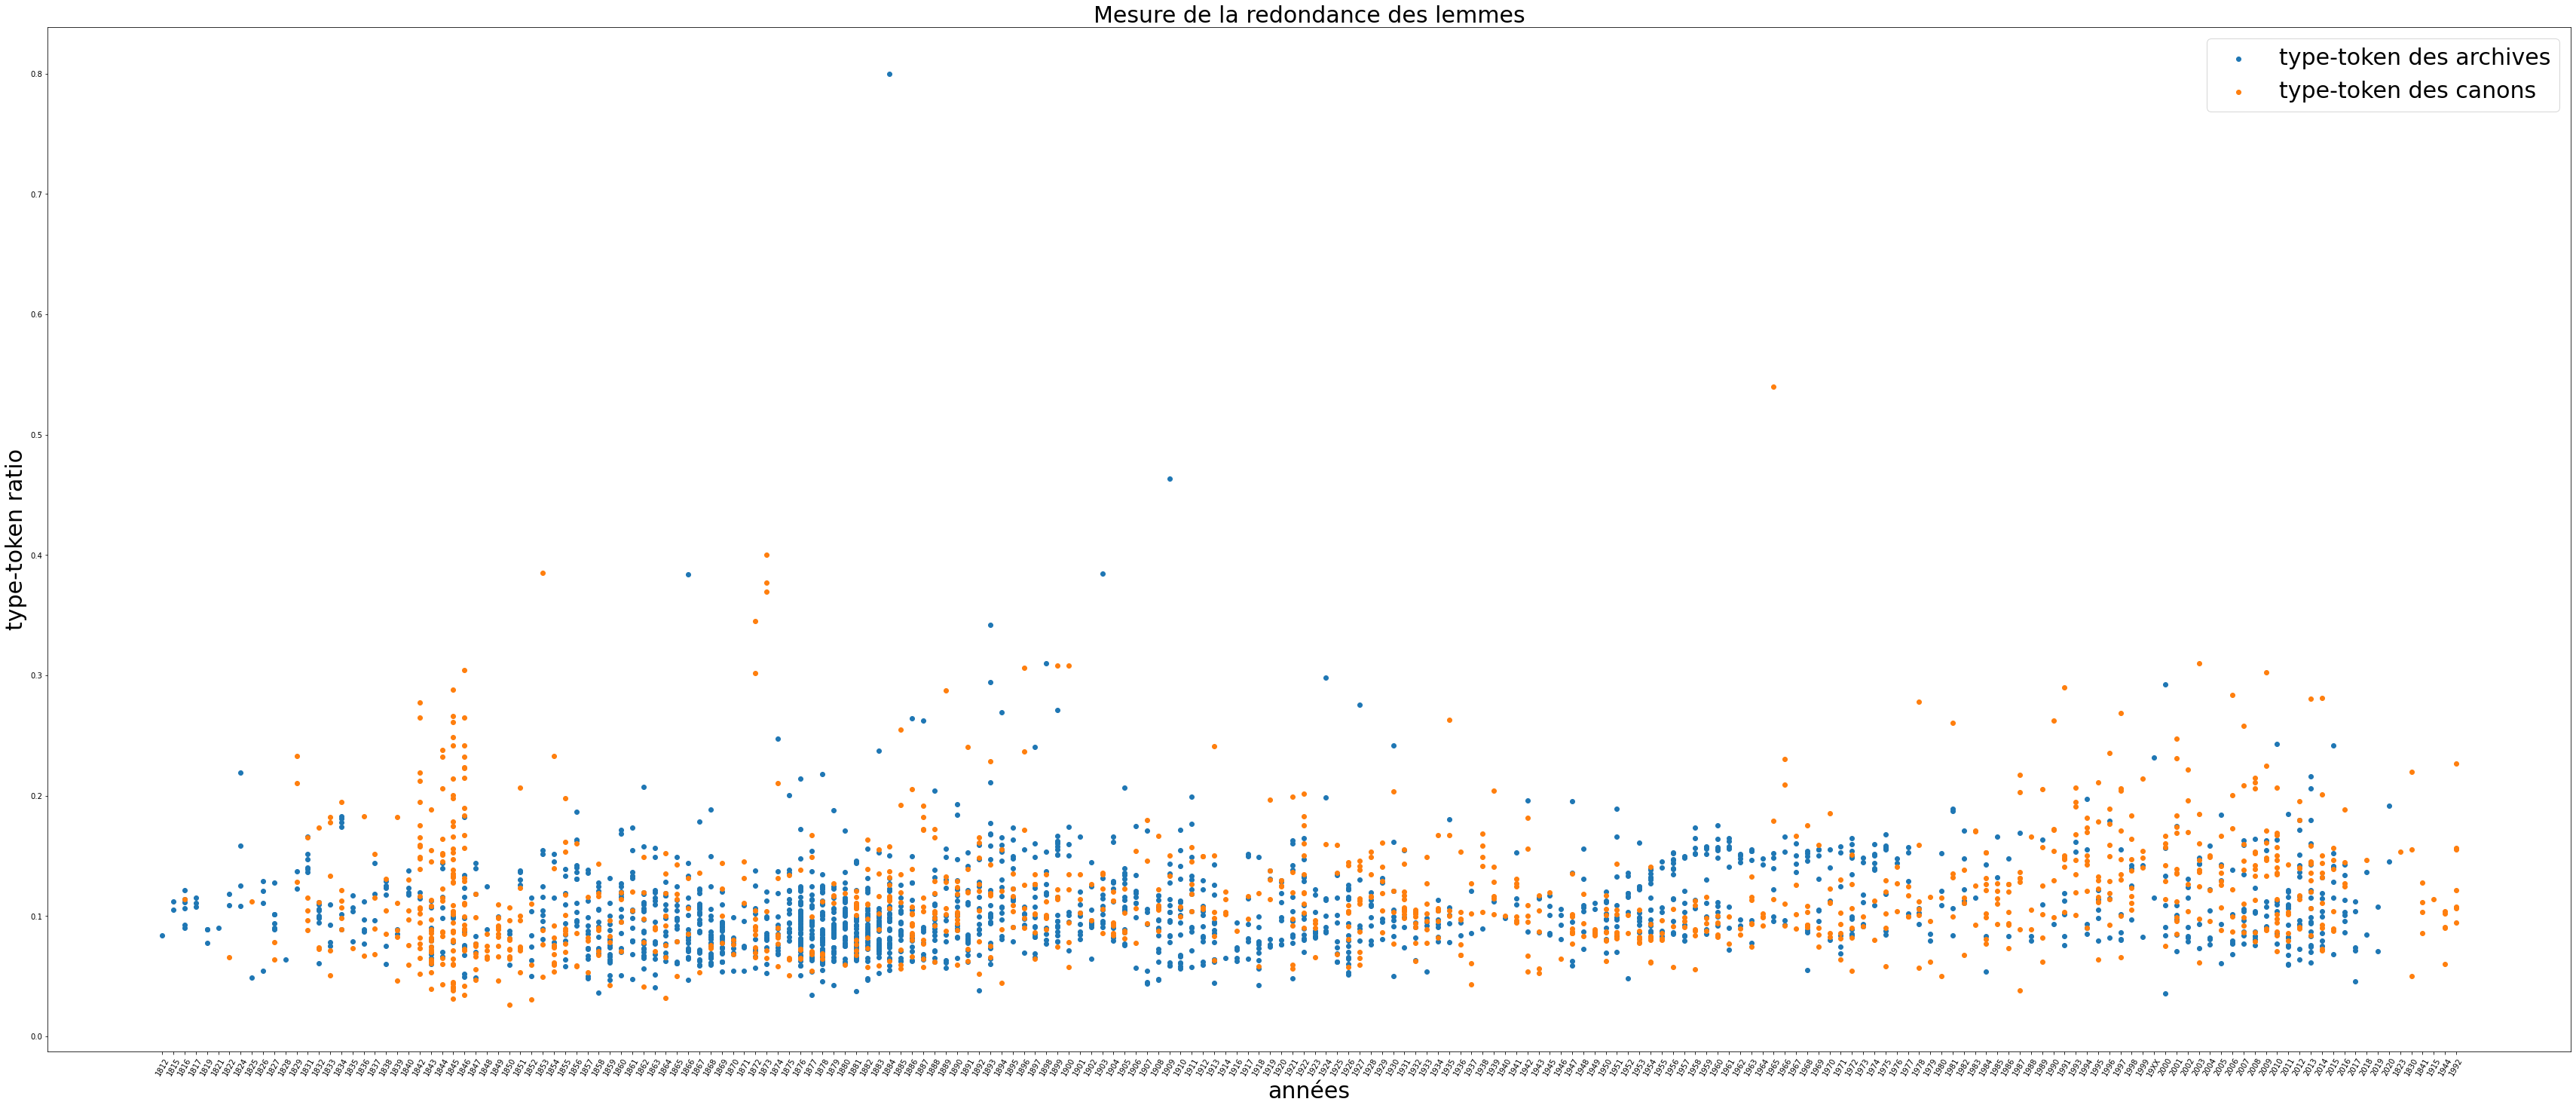

In [11]:
plt.figure(figsize=(60,25))
plt.scatter(annee_archive, type_token_archive, label = 'type-token des archives')
plt.scatter(annee_canon, type_token_canon, label = 'type-token des canons')
plt.ylabel('type-token ratio', fontsize=30)
plt.xlabel('années', fontsize=30)
plt.xticks(rotation=60)

plt.title('Mesure de la redondance des lemmes', fontsize=30)
plt.legend(prop={'size': 30})
plt.show()

In [9]:
sum(type_token_canon)/len(type_token_canon)

0.11831386199224396

In [10]:
sum(type_token_archive)/len(type_token_archive)

0.1053397556095642